In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#this dataset contains 891 rows and 12 col.out of which 1 is target var. and other 11 are independent var.
df.shape

(891, 12)

In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#shows the datatypes present in the dataset with memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
"""here we can see there is 177 null values in age column,687 null values in cabin and 2 null values in embarkerd column.
so,first deal with this.
Using mean method for age in contineous data.
and mode method for categorical data i.e.embarked and cabin column"""

'here we can see there is 177 null values in age column,687 null values in cabin and 2 null values in embarkerd column.\nso,first deal with this.\nUsing mean method for age in contineous data.\nand mode method for categorical data i.e.embarked and cabin column'

In [8]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
#Again checking the null values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
"""We can see here no null values present in dataset now."""

'We can see here no null values present in dataset now.'

In [11]:
#checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64


Survived
0    549
1    342
Name: count, dtype: int64


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64


Sex
male      577
female    314
Name: count, dtype: int64


Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000    

In [12]:
#checking no of unique values in each col
df.nunique().to_frame("No of unique values")

,No of unique values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,89
SibSp,7
Parch,7
Ticket,681
Fare,248


In [13]:
#separating numerical and categorical columns

#checking for categorical column
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical columns: ",cat_col)
print("\n")
#checking for numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        num_col.append(i)
print("numerical columns: ",num_col)
print("\n")

Categorical columns:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


numerical columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']




In [14]:
#encoding categorical cols using LabelEncoder

from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=lab_enc.fit_transform(df[i].values.reshape(-1,1))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,47,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,47,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,47,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


In [15]:
#checking duplicate values
df.duplicated().sum()

0

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


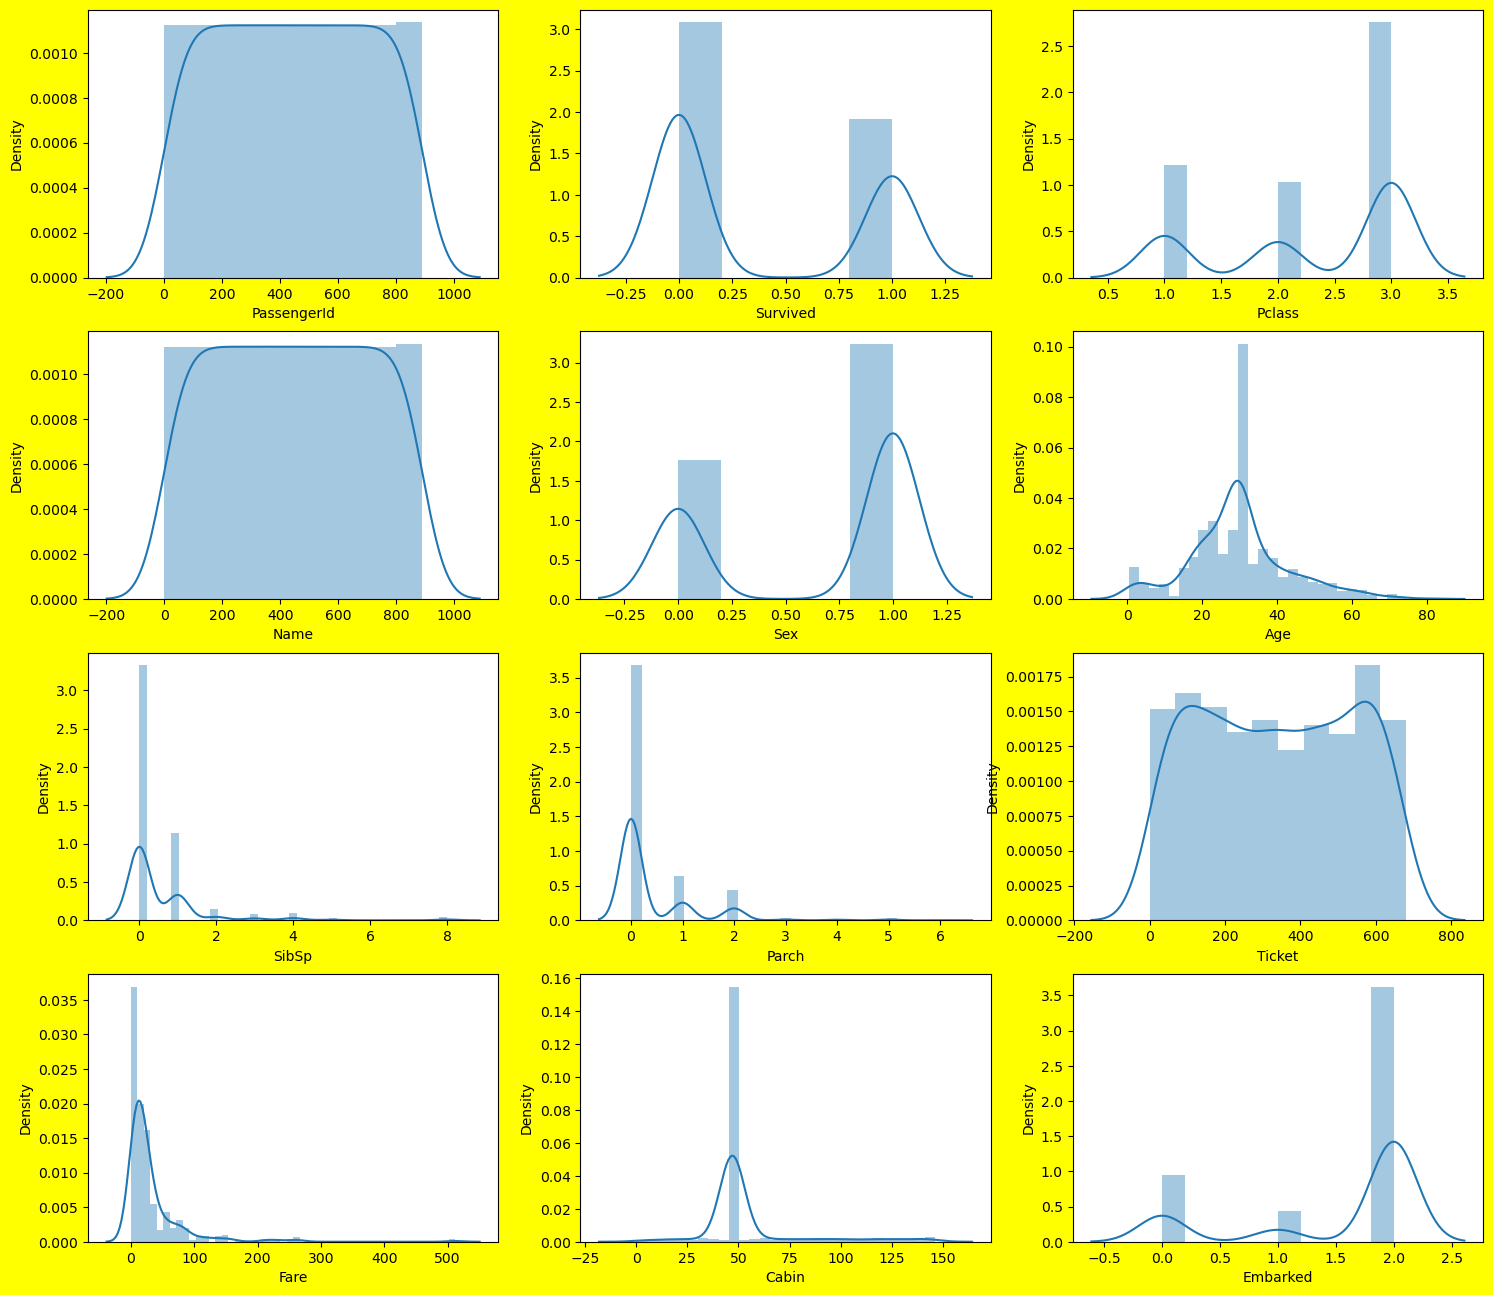

In [17]:
#lets see how data is distributed for every column
plt.figure(figsize=(18,16),facecolor="yellow")
p=1
for col in df:
    if p<=12:
        ax=plt.subplot(4,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

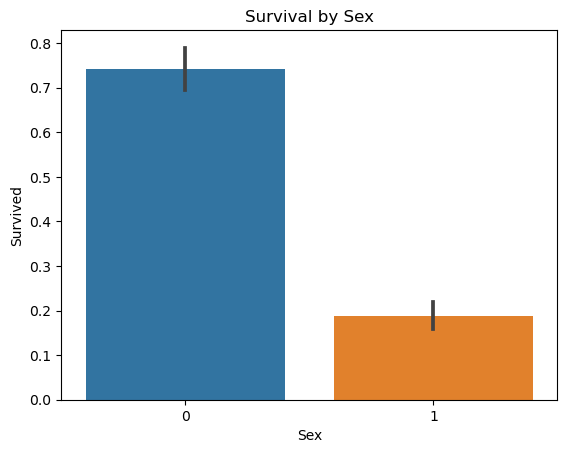

In [18]:
#comparing Sex and SURVIVAL
plt.title("Survival by Sex")
sns.barplot(x="Sex",y="Survived",data=df)
plt.show()

In [19]:
"""here 0 represents male and 1 represents female on the x axis. the survival count of male is higher than the female."""

'here 0 represents male and 1 represents female on the x axis. the survival count of male is higher than the female.'

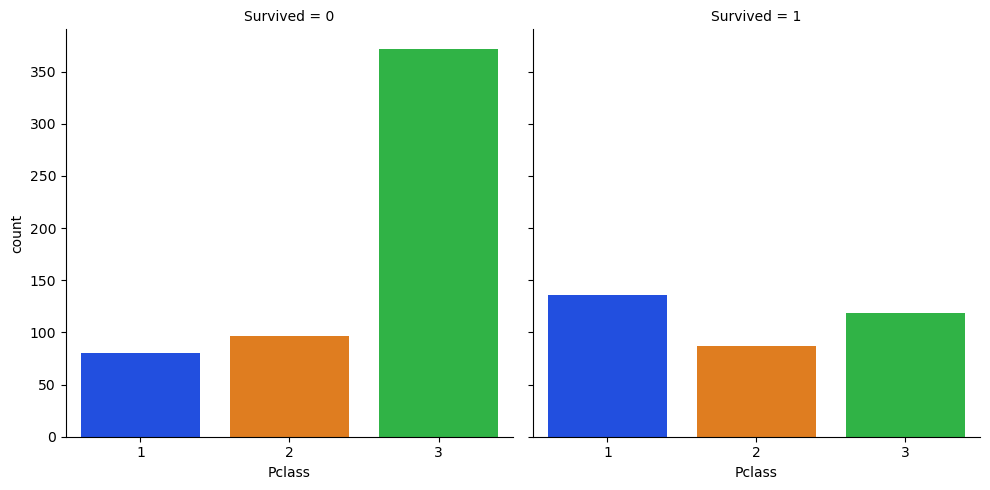

In [20]:
#checking Survival by Pclass
sns.catplot(x="Pclass",col="Survived",data=df,kind="count",palette='bright')
plt.show()

In [21]:
"""Here we can see the non survival of class 3 is higher and The people who survived class 1 is higher,class 3 is bit lesser
and class 2 is more lesser."""

'Here we can see the non survival of class 3 is higher and The people who survived class 1 is higher,class 3 is bit lesser\nand class 2 is more lesser.'

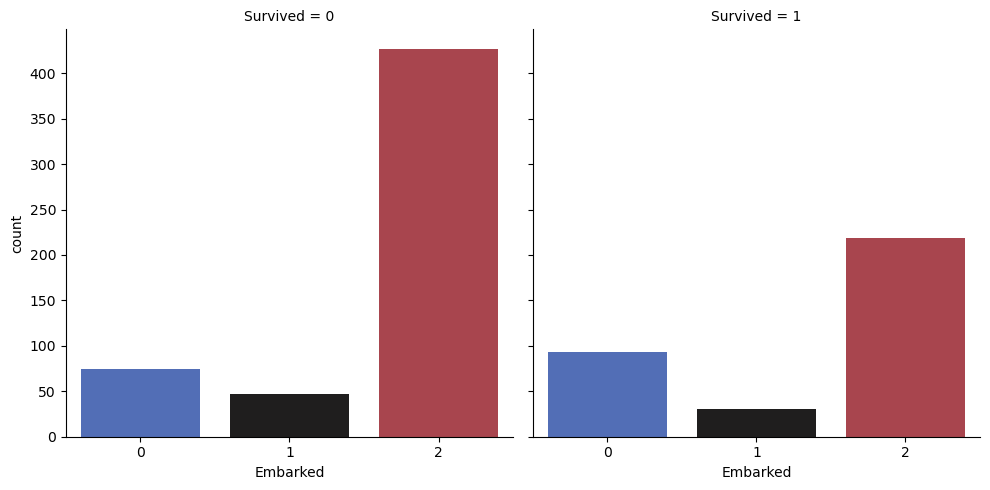

In [22]:
#checking Survival by Embarked
sns.catplot(x="Embarked",col="Survived",data=df,kind="count",palette='icefire')
plt.show()
#Embarked  C-0  Q-1  S-2

In [23]:
"""Here we see the Embarked 2 means Southampton is non survival range higher than the C -0 and Q-1.
In the Embarked 2 means Southampton in survival range higher than the C -0 and Q-1 and least one is Q-1"""

'Here we see the Embarked 2 means Southampton is non survival range higher than the C -0 and Q-1.\nIn the Embarked 2 means Southampton in survival range higher than the C -0 and Q-1 and least one is Q-1'

In [24]:
#For outliers
df_feature=df.drop('Survived',axis=1)

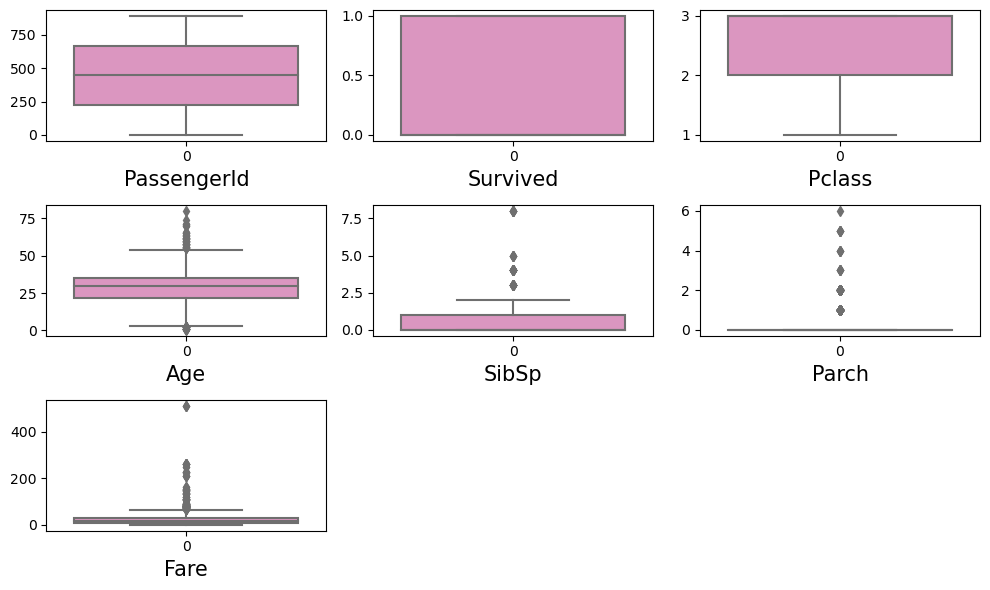

In [25]:
#cheking the outliers using boxplot
plt.figure(figsize=(10,6))
plotnumber=1
for col in num_col:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [26]:
"""here we can see outliers present in Age,SibSp,Parch and Fare. using Zscore and Iqr technique we can remove Outliers"""

'here we can see outliers present in Age,SibSp,Parch and Fare. using Zscore and Iqr technique we can remove Outliers'

In [27]:
from scipy.stats import zscore
z_score=zscore(df[['Age','SibSp','Parch','Fare']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [28]:
#after removing outliers
df.shape

(820, 12)

In [29]:
"""After removing the outliers dataset contains 820 rows and 12 columns"""

'After removing the outliers dataset contains 820 rows and 12 columns'

In [30]:
#we can drop the name column because its contain no useful information
df.drop(['Name'],axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,0,26.000000,0,0,669,7.9250,47,2
3,4,1,1,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,101,13.0000,47,2
887,888,1,1,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,0,29.699118,1,2,675,23.4500,47,2
889,890,1,1,1,26.000000,0,0,8,30.0000,60,0


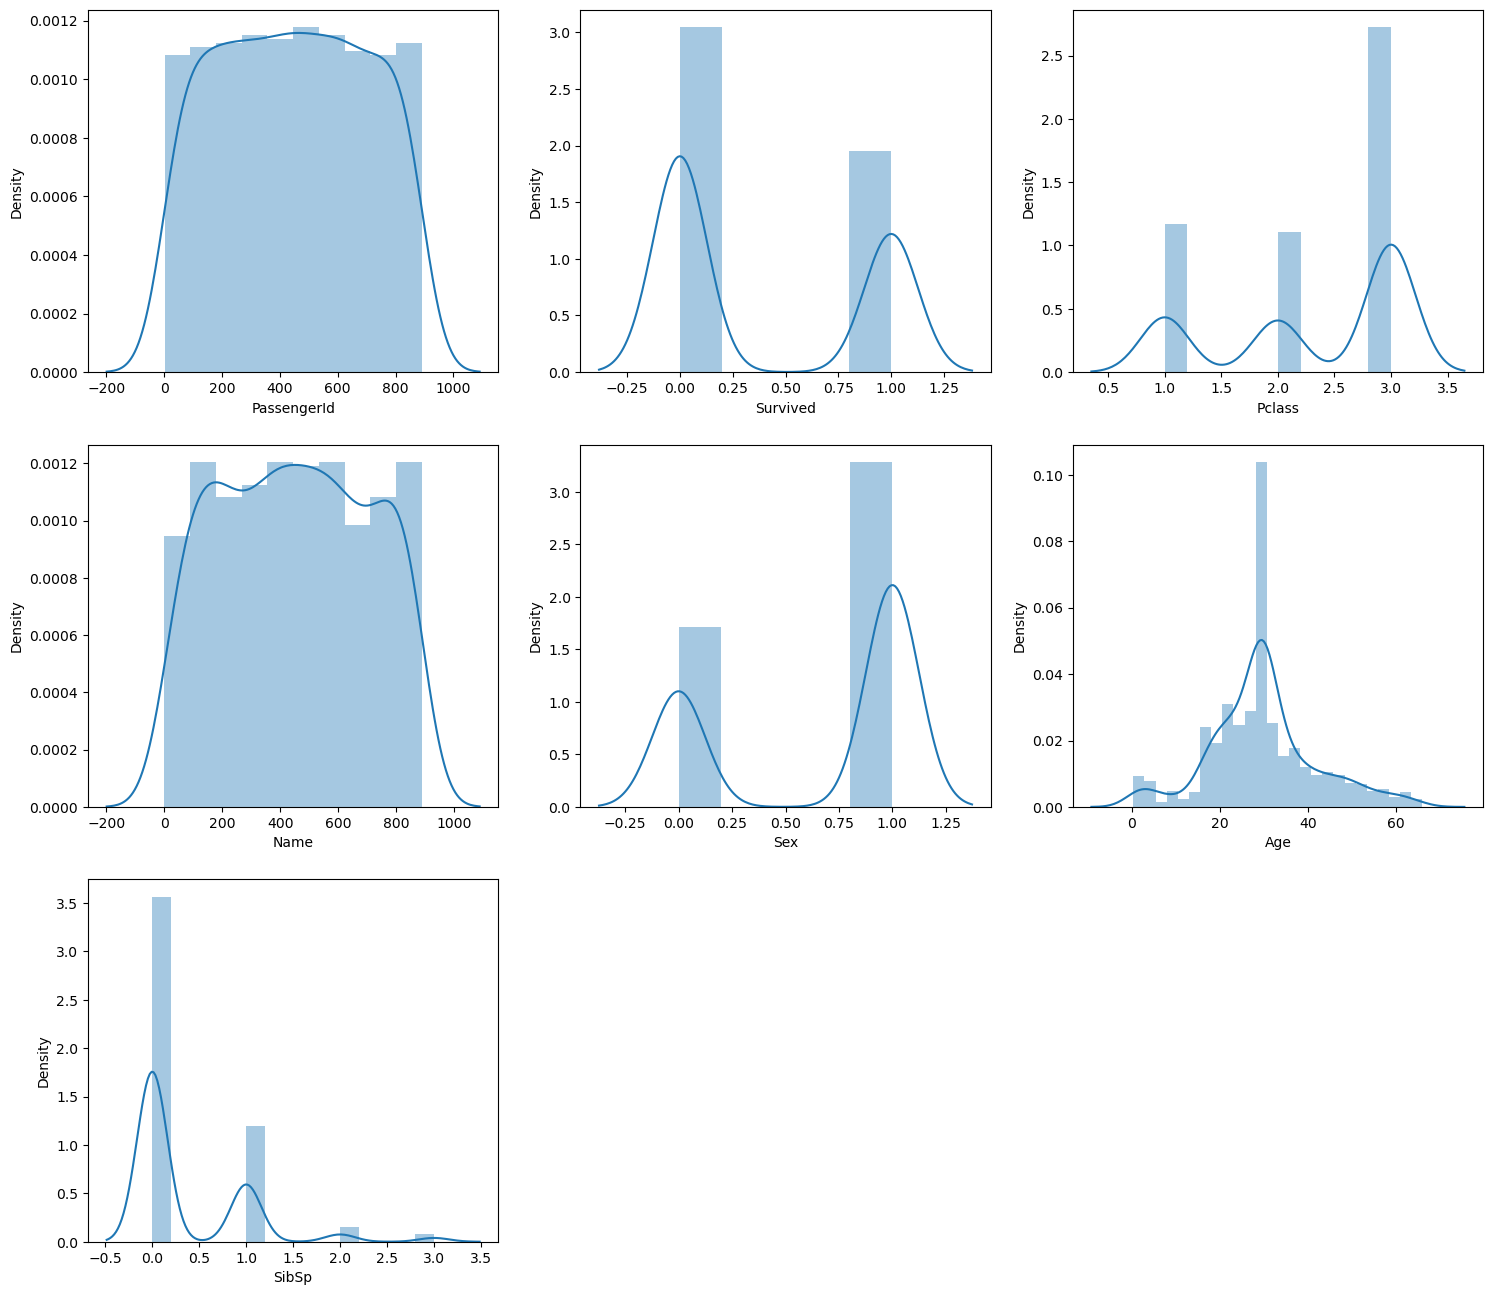

In [31]:
#lets see how data is distributed for every column
plt.figure(figsize=(18,16))
p=1
for col in df:
    if p<=7:
        ax=plt.subplot(3,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [32]:
"""after the removing outliers data looks much better.
Now, checking the correlation between variables"""

'after the removing outliers data looks much better.\nNow, checking the correlation between variables'

In [33]:
#checking the correlation between features and target
cor=df.corr()
cor

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.013852,-0.027701,-0.051517,0.066160,0.007532,-0.052125,0.005887,-0.065960,-0.005099,-0.012994,0.019099
Survived,-0.013852,1.000000,-0.322306,-0.044233,-0.554888,-0.090926,0.094459,0.201071,-0.159393,0.330439,0.189226,-0.154994
Pclass,-0.027701,-0.322306,1.000000,0.044971,0.138041,-0.327522,-0.052312,-0.078366,0.352118,-0.691720,-0.272529,0.122145
Name,-0.051517,-0.044233,0.044971,1.000000,0.003776,0.069219,-0.060382,-0.020554,0.054765,-0.050119,0.028656,-0.006604
Sex,0.066160,-0.554888,0.138041,0.003776,1.000000,0.094544,-0.199204,-0.251872,0.063902,-0.244614,-0.114472,0.116708
Age,0.007532,-0.090926,-0.327522,0.069219,0.094544,1.000000,-0.148196,-0.259724,-0.092491,0.152344,0.081810,-0.008781
SibSp,-0.052125,0.094459,-0.052312,-0.060382,-0.199204,-0.148196,1.000000,0.307210,-0.005648,0.247216,0.062609,-0.013767
Parch,0.005887,0.201071,-0.078366,-0.020554,-0.251872,-0.259724,0.307210,1.000000,-0.025725,0.259903,0.093075,-0.016184
Ticket,-0.065960,-0.159393,0.352118,0.054765,0.063902,-0.092491,-0.005648,-0.025725,1.000000,-0.150579,-0.058429,0.030363
Fare,-0.005099,0.330439,-0.691720,-0.050119,-0.244614,0.152344,0.247216,0.259903,-0.150579,1.000000,0.233990,-0.192566


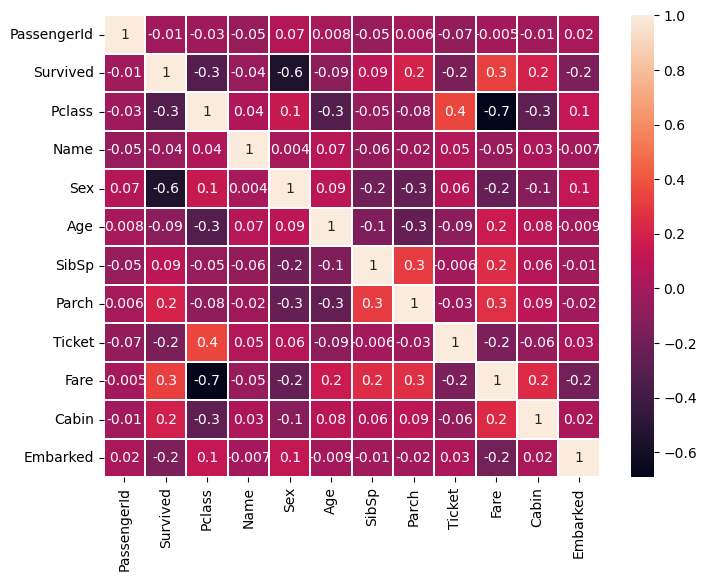

In [34]:
#visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="white",annot=True)
plt.yticks(rotation=0);
plt.show()

In [35]:
"""Here we can see the Pclass are negatively correlated with survival.Sex is highly correlated with survived.
Embarked,cabin,fare has the low correlated with survived"""

'Here we can see the Pclass are negatively correlated with survival.Sex is highly correlated with survived.\nEmbarked,cabin,fare has the low correlated with survived'

In [36]:
cor['Survived'].sort_values(ascending = False)
#We can observe the positive and negative correlated features with the target

Survived       1.000000
Fare           0.330439
Parch          0.201071
Cabin          0.189226
SibSp          0.094459
PassengerId   -0.013852
Name          -0.044233
Age           -0.090926
Embarked      -0.154994
Ticket        -0.159393
Pclass        -0.322306
Sex           -0.554888
Name: Survived, dtype: float64

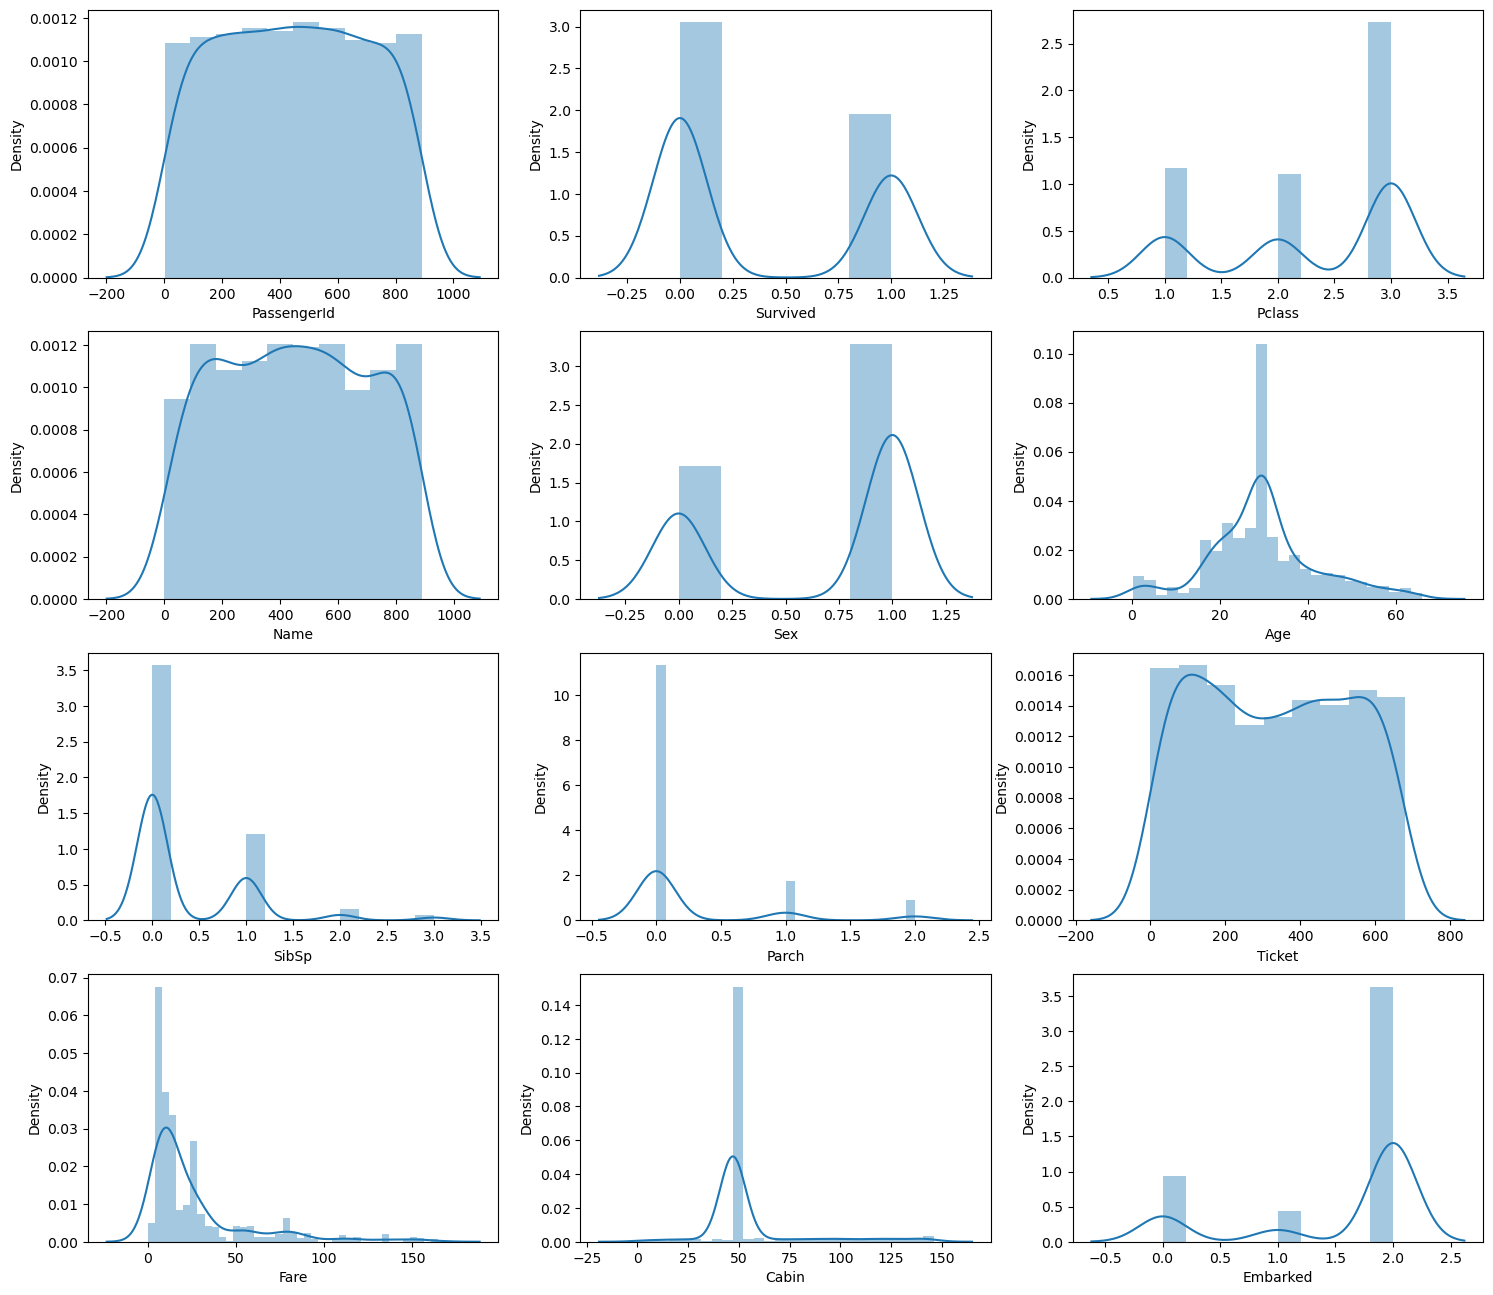

In [37]:
#Cheking For Skewness
#lets see how data is distributed for every column
plt.figure(figsize=(18,16))
p=1
for col in df:
    if p<=12:
        ax=plt.subplot(4,3,p)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=10)
    p+=1
plt.show()

In [38]:
"""from above observation we can say that the skewness is present in SibSp,Parch,Fare,Cabin. Remaining all columns data looks
almost normally distributed. Using cube root method we can remove the skewness. but the column Cabin has categorical 
data so no need to remove skewness"""

'from above observation we can say that the skewness is present in SibSp,Parch,Fare,Cabin. Remaining all columns data looks\nalmost normally distributed. Using cube root method we can remove the skewness. but the column Cabin has categorical \ndata so no need to remove skewness'

In [39]:
#checking skewness
df.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Name           0.010147
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Ticket         0.039240
Fare           2.318761
Cabin          2.229916
Embarked      -1.277386
dtype: float64

In [40]:
df['SibSp']=np.cbrt(df['SibSp'])
df['Parch']=np.cbrt(df['Parch'])
df['Fare']=np.cbrt(df['Fare'])

In [41]:
#again checking skewness
df.skew()

PassengerId    0.003454
Survived       0.450825
Pclass        -0.632242
Name           0.010147
Sex           -0.664152
Age            0.318314
SibSp          1.018770
Parch          1.643259
Ticket         0.039240
Fare           0.708623
Cabin          2.229916
Embarked      -1.277386
dtype: float64

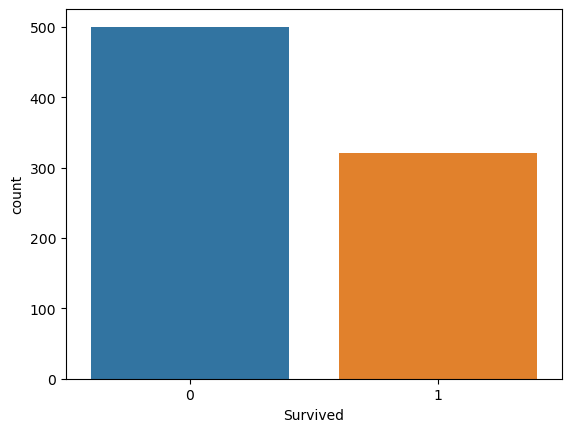

In [43]:
#checking the count of Survived
sns.countplot(data=df,x='Survived')
plt.show()

In [44]:
"""From the above graph we can see data is imbalanced.
using SMOTE we can do resampling for balancing data 
for that first do feature scaling"""

'From the above graph we can see data is imbalanced.\nusing SMOTE we can do resampling for balancing data \nfor that first do feature scaling'

In [45]:
#separating features and label
x=df.drop("Survived",axis=1)
y=df["Survived"]

In [46]:
#Feature Scaling using Standard Scalarization
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.743605,0.833995,-1.344994,0.722036,-0.641702,1.454211,-0.480921,0.952215,-0.766275,-0.302034,0.583162
1,-1.739685,-1.586804,-1.022273,-1.384973,0.675821,1.454211,-0.480921,1.315349,1.623850,1.105170,-1.953669
2,-1.735764,0.833995,-0.380767,-1.384973,-0.312321,-0.627757,-0.480921,1.678482,-0.703257,-0.302034,0.583162
3,-1.731843,-1.586804,-0.699552,-1.384973,0.428785,1.454211,-0.480921,-1.405665,1.204749,0.029073,0.583162
4,-1.727923,0.833995,-1.711007,0.722036,0.428785,-0.627757,-0.480921,0.698519,-0.691984,-0.302034,0.583162
...,...,...,...,...,...,...,...,...,...,...,...
815,1.730122,-0.376405,0.386680,0.722036,-0.229976,-0.627757,-0.480921,-1.146995,-0.316660,-0.302034,0.583162
816,1.734043,-1.586804,-0.577548,-1.384973,-0.888737,-0.627757,-0.480921,-1.579770,0.500522,-1.005636,0.583162
817,1.737964,0.833995,-0.144629,-1.384973,-0.007717,1.454211,2.445624,1.708329,0.235725,-0.302034,0.583162
818,1.741884,-1.586804,-1.451256,0.722036,-0.312321,-0.627757,-0.480921,-1.609617,0.500522,0.236015,-1.953669


In [47]:
#Checking Variance Inflation Factor(VIF)
#finding variance inflation factor in each scaled col 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) 
for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF Values,Features
0,1.015744,PassengerId
1,2.582003,Pclass
2,1.021925,Name
3,1.149470,Sex
4,1.250433,Age
5,1.314773,SibSp
6,1.322481,Parch
7,1.165870,Ticket
8,2.664870,Fare
9,1.108707,Cabin


In [48]:
#checking the value counts of target variable i.e.Survived column
y.value_counts()

Survived
0    500
1    320
Name: count, dtype: int64

In [49]:
"'Here we can see that the data is not balanced,we will balance the data using oversampling method"''

"'Here we can see that the data is not balanced,we will balance the data using oversampling method"

In [50]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [51]:
#after SMOTE() checking value count of target col
y1.value_counts()

Survived
0    500
1    500
Name: count, dtype: int64

In [52]:
#split into train test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=41)

In [53]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("\n----------------Train Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred=clf.predict(x_test)
        print("\n----------------Test Result------------------\n")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%")
        print('\n\n The Classification Report\n', classification_report(y_test,pred,digits=2))

In [54]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 85.67%


 The Classification Report
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       151
           1       0.86      0.85      0.86       149

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [57]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [58]:
metric_score(LR,x_train,x_test,y_train,y_test,train=True)
metric_score(LR,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 79.71%

----------------Test Result------------------

Accuracy Score: 80.33%


 The Classification Report
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       151
           1       0.80      0.81      0.80       149

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



In [59]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

#Extra Trees Classifier
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)

ExtraTreesClassifier()

In [60]:
metric_score(ETC,x_train,x_test,y_train,y_test,train=True)
metric_score(ETC,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 100.00%

----------------Test Result------------------

Accuracy Score: 84.33%


 The Classification Report
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       151
           1       0.84      0.85      0.84       149

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [61]:
#Support Vector machine
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [62]:
metric_score(svc,x_train,x_test,y_train,y_test,train=True)
metric_score(svc,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 86.57%

----------------Test Result------------------

Accuracy Score: 81.00%


 The Classification Report
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.81      0.81      0.81       149

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



In [63]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [64]:
metric_score(KNN,x_train,x_test,y_train,y_test,train=True)
metric_score(KNN,x_train,x_test,y_train,y_test,train=False)


----------------Train Result------------------

Accuracy Score: 85.86%

----------------Test Result------------------

Accuracy Score: 79.33%


 The Classification Report
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       151
           1       0.77      0.83      0.80       149

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300



In [65]:
#..........CROSS VALIDATION SCORE........
from sklearn.model_selection import cross_val_score

In [75]:
#checking cv score for Random Forest Classifier
score=cross_val_score(random_clf,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=random_clf.predict(x_test)
acc_score1=accuracy_score(y_test,pred)
acc_score1

print("Difference between Accuracy Score and Cross Validation Score:",acc_score1-score.mean())

[0.82926829 0.81707317 0.87195122 0.84756098 0.84146341]
0.8414634146341463
Difference between Accuracy Score and Cross Validation Score: 0.015203252032520376


In [76]:
#checking cv score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=LR.predict(x_test)
acc_score2=accuracy_score(y_test,pred)
acc_score2

print("Difference between Accuracy Score and Cross Validation Score:",acc_score2-score.mean())

[0.81097561 0.78658537 0.77439024 0.7804878  0.79878049]
0.7902439024390244
Difference between Accuracy Score and Cross Validation Score: 0.013089430894308918


In [77]:
#checking cv score for Extra Trees Classifier
score=cross_val_score(ETC,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=ETC.predict(x_test)
acc_score3=accuracy_score(y_test,pred)
acc_score3

print("Difference between Accuracy Score and Cross Validation Score:",acc_score3-score.mean())

[0.81707317 0.79268293 0.83536585 0.82317073 0.86585366]
0.826829268292683
Difference between Accuracy Score and Cross Validation Score: 0.016504065040650384


In [78]:
#checking cv score for Support Vector Machine
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=svc.predict(x_test)
acc_score4=accuracy_score(y_test,pred)
acc_score4

print("Difference between Accuracy Score and Cross Validation Score:",acc_score4-score.mean())

[0.82317073 0.79878049 0.82926829 0.79268293 0.8597561 ]
0.8207317073170731
Difference between Accuracy Score and Cross Validation Score: -0.01073170731707307


In [79]:
#checking cv score for KNN
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())

#here predicting once again because variables inside the function are local variables
pred=KNN.predict(x_test)
acc_score5=accuracy_score(y_test,pred)
acc_score5

print("Difference between Accuracy Score and Cross Validation Score:",acc_score5-score.mean())

[0.79268293 0.76219512 0.81097561 0.7804878  0.78658537]
0.7865853658536586
Difference between Accuracy Score and Cross Validation Score: 0.006747967479674766


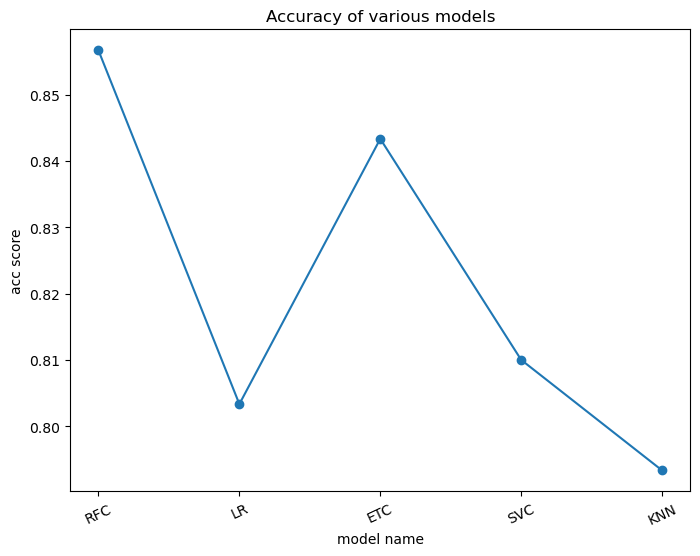

In [80]:
plt.figure(figsize=(8,6))
plt.plot(range(1,6),[acc_score1,acc_score2,acc_score3,acc_score4,acc_score5],marker='o')
plt.xticks(range(1,6),['RFC','LR','ETC','SVC','KNN'],rotation=25)
plt.title('Accuracy of various models')
plt.xlabel('model name')
plt.ylabel("acc score")
plt.show()

In [81]:
"""Random Forest Classifier is our best model as the difference between accuracy score and cross 
validation score is least

...............RandomForestClassifier IS OUR BEST MODEL......"""

'Random Forest Classifier is our best model as the difference between accuracy score and cross \nvalidation score is least\n\n...............RandomForestClassifier IS OUR BEST MODEL......'

In [84]:
#Hyperparameter Tunning
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[20,50,100,200],
      'max_features':['auto','sqrt','log2'],
      'bootstrap':[False,True],
       'min_samples_split':[2],
      'random_state':range(1,20),
      
      }
gscv=GridSearchCV(RandomForestClassifier(),param,n_jobs=-1,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2],
                         'n_estimators': [20, 50, 100, 200],
                         'random_state': range(1, 20)})

In [85]:
gscv.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 2}

In [86]:
model=RandomForestClassifier(min_samples_split=2,max_features='sqrt',bootstrap=False,random_state=2,n_estimators=100)
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.0


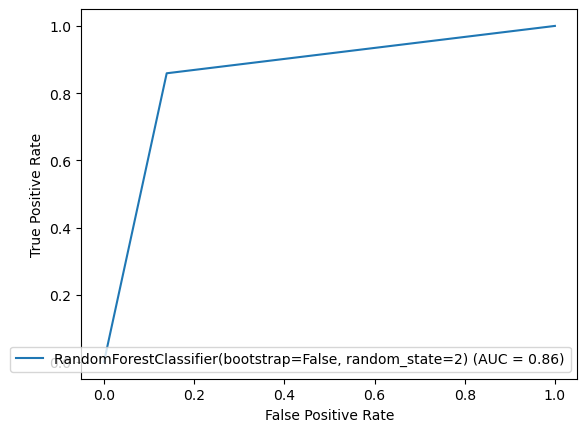

In [87]:
from sklearn.metrics import roc_curve
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=model)
display.plot()

In [88]:
#saving model
import joblib
joblib.dump(model,"titanic.pkl")

['titanic.pkl']

In [90]:
model=joblib.load("titanic.pkl")
prediction=model.predict(x_test)
prediction

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1], d

In [91]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,1,1
1,1,0
2,0,1
3,0,0
4,1,1
...,...,...
295,0,0
296,0,0
297,1,1
298,0,0
